# Loan Approval Prediction - Classification Models

**Dataset:** Kaggle Loan Approval Dataset  
**Goal:** Build and compare 6 classification models to predict loan approval decisions

---

## 1. Import Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 2. Load and Explore Data

In [87]:
# Load dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

print("Dataset loaded!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded!
Shape: (4269, 13)

First few rows:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [88]:
# Dataset info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [89]:
# Check for missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print("Missing values:")
    print(missing[missing > 0])

✓ No missing values found!


In [90]:
# Statistical summary
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## 3. Target Variable Analysis

Loan Status Distribution:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Percentage:
loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


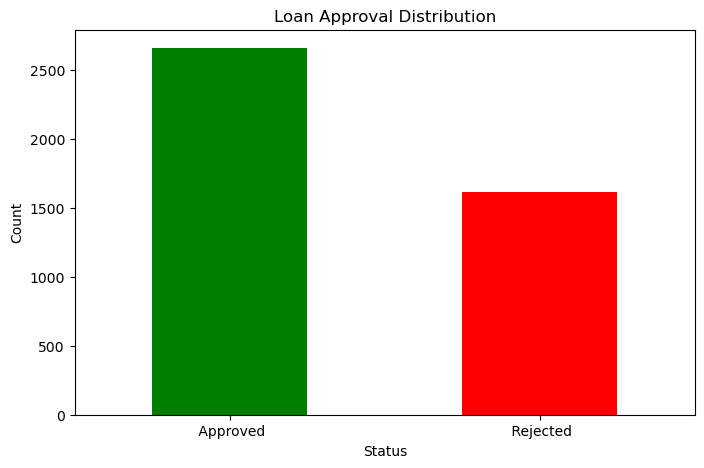

In [91]:
# Check target distribution
print("Loan Status Distribution:")
print(df['loan_status'].value_counts())
print(f"\nPercentage:")
print(df['loan_status'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8,5))
df['loan_status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Loan Approval Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 4. Feature Analysis

In [92]:
# Separate categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns.tolist()
if 'loan_status' in categorical_features:
    categorical_features.remove('loan_status')

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'loan_id' in numerical_features:
    numerical_features.remove('loan_id')

print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"\nNumerical features ({len(numerical_features)}): {numerical_features}")

Categorical features (2): ['education', 'self_employed']

Numerical features (9): ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


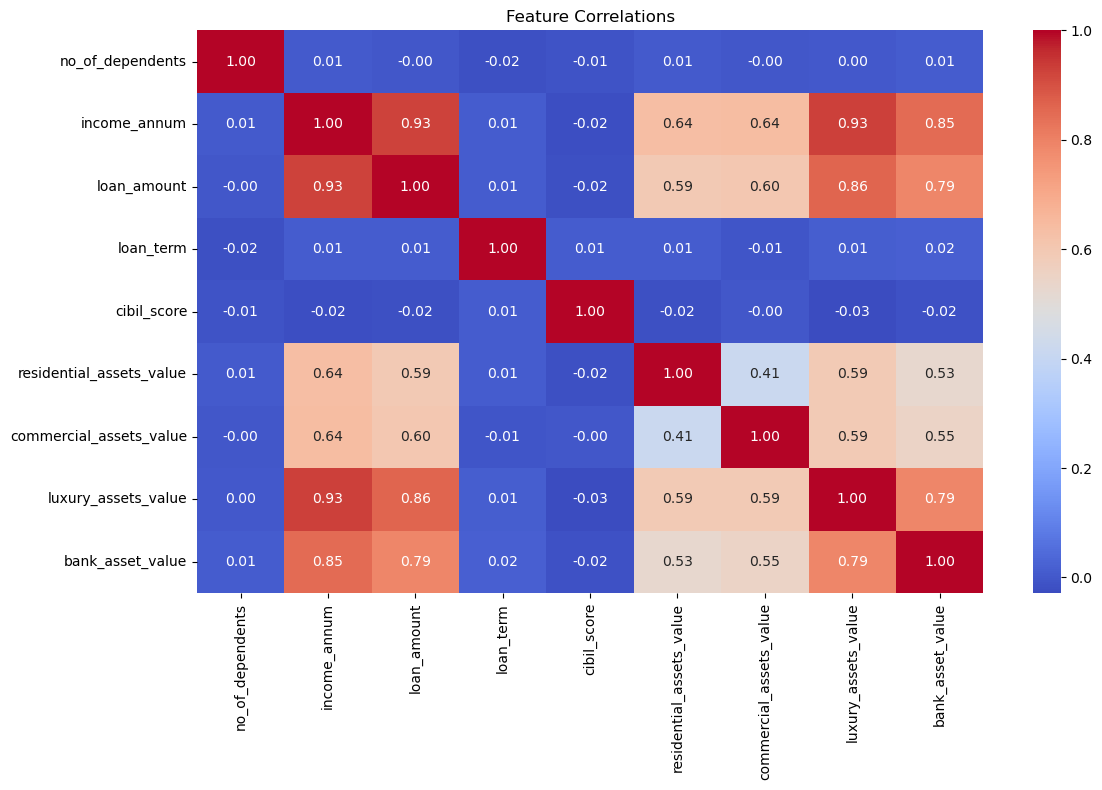

In [93]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

## 5. Data Preprocessing

In [94]:
# Drop loan_id if it exists (it's just an identifier)
if 'loan_id' in df.columns:
    df = df.drop('loan_id', axis=1)
    print("Dropped loan_id column")

# Encode target variable
df['loan_status'] = df['loan_status'].str.strip()  # Remove spaces
target_mapping = {'Approved': 1, 'Rejected': 0}
df['loan_status'] = df['loan_status'].map(target_mapping)

print("Target encoding: Approved=1, Rejected=0")
print(f"Unique values: {df['loan_status'].unique()}")

Dropped loan_id column
Target encoding: Approved=1, Rejected=0
Unique values: [1 0]


In [95]:
# Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (4269, 11)
Target shape: (4269,)


In [96]:
# One-hot encode categorical variables (keeping all dummies to maintain feature count)
X = pd.get_dummies(X, drop_first=False)

# Clean column names for XGBoost compatibility
X.columns = X.columns.str.replace('[', '', regex=False)
X.columns = X.columns.str.replace(']', '', regex=False)
X.columns = X.columns.str.replace('<', '', regex=False)

print(f"After encoding, total features: {X.shape[1]}")
print(f"\nFeature names: {list(X.columns)}")

After encoding, total features: 13

Feature names: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No', 'self_employed_ Yes']


In [97]:
# Train-test split (80-20 with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 3415 samples
Test set: 854 samples


In [98]:
# Feature scaling (needed for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling done!")
print("Scaled data will be used for: Logistic Regression, KNN, Naive Bayes")
print("Original data will be used for: Decision Tree, Random Forest, XGBoost")

Feature scaling done!
Scaled data will be used for: Logistic Regression, KNN, Naive Bayes
Original data will be used for: Decision Tree, Random Forest, XGBoost


## 6. Model Training & Evaluation

In [99]:
# Initialize all 6 models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
}

print("Models initialized:")
for name in models.keys():
    print(f"  • {name}")

Models initialized:
  • Logistic Regression
  • Decision Tree
  • KNN
  • Naive Bayes
  • Random Forest
  • XGBoost


In [100]:
# Train models and calculate metrics
print("\nTraining models...\n")
print("="*70)

results = []
models_requiring_scaling = ['Logistic Regression', 'KNN', 'Naive Bayes']

for name, model in models.items():
    print(f"\nTraining: {name}")
    
    # Use appropriate data
    if name in models_requiring_scaling:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # Train
    model.fit(X_tr, y_train)
    
    # Predict
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]
    
    # Calculate all 6 metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    results.append({
        'ML Model Name': name,
        'Accuracy': acc,
        'AUC': auc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'MCC': mcc
    })
    
    print(f"  Accuracy: {acc:.4f} | AUC: {auc:.4f} | F1: {f1:.4f}")

print("\n" + "="*70)
print("Training complete!")


Training models...


Training: Logistic Regression
  Accuracy: 0.9133 | AUC: 0.9726 | F1: 0.9311

Training: Decision Tree
  Accuracy: 0.9789 | AUC: 0.9849 | F1: 0.9832

Training: KNN
  Accuracy: 0.8958 | AUC: 0.9614 | F1: 0.9171

Training: Naive Bayes
  Accuracy: 0.9473 | AUC: 0.9765 | F1: 0.9577

Training: Random Forest
  Accuracy: 0.9801 | AUC: 0.9988 | F1: 0.9840

Training: XGBoost
  Accuracy: 0.9801 | AUC: 0.9982 | F1: 0.9840

Training complete!


## 7. Results Comparison

In [101]:
# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

# Sort by F1 Score
results_sorted = results_df.sort_values('F1 Score', ascending=False)

print("\nModel Performance Comparison (sorted by F1 Score):\n")
print(results_sorted.to_string(index=False))

# Save to CSV
results_df.to_csv('model_comparison_metrics.csv', index=False)
print("\n✓ Saved to model_comparison_metrics.csv")


Model Performance Comparison (sorted by F1 Score):

      ML Model Name  Accuracy    AUC  Precision  Recall  F1 Score    MCC
      Random Forest    0.9801 0.9988     0.9813  0.9868    0.9840 0.9576
            XGBoost    0.9801 0.9982     0.9813  0.9868    0.9840 0.9576
      Decision Tree    0.9789 0.9849     0.9759  0.9906    0.9832 0.9552
        Naive Bayes    0.9473 0.9765     0.9568  0.9586    0.9577 0.8879
Logistic Regression    0.9133 0.9726     0.9208  0.9416    0.9311 0.8148
                KNN    0.8958 0.9614     0.9077  0.9266    0.9171 0.7772

✓ Saved to model_comparison_metrics.csv


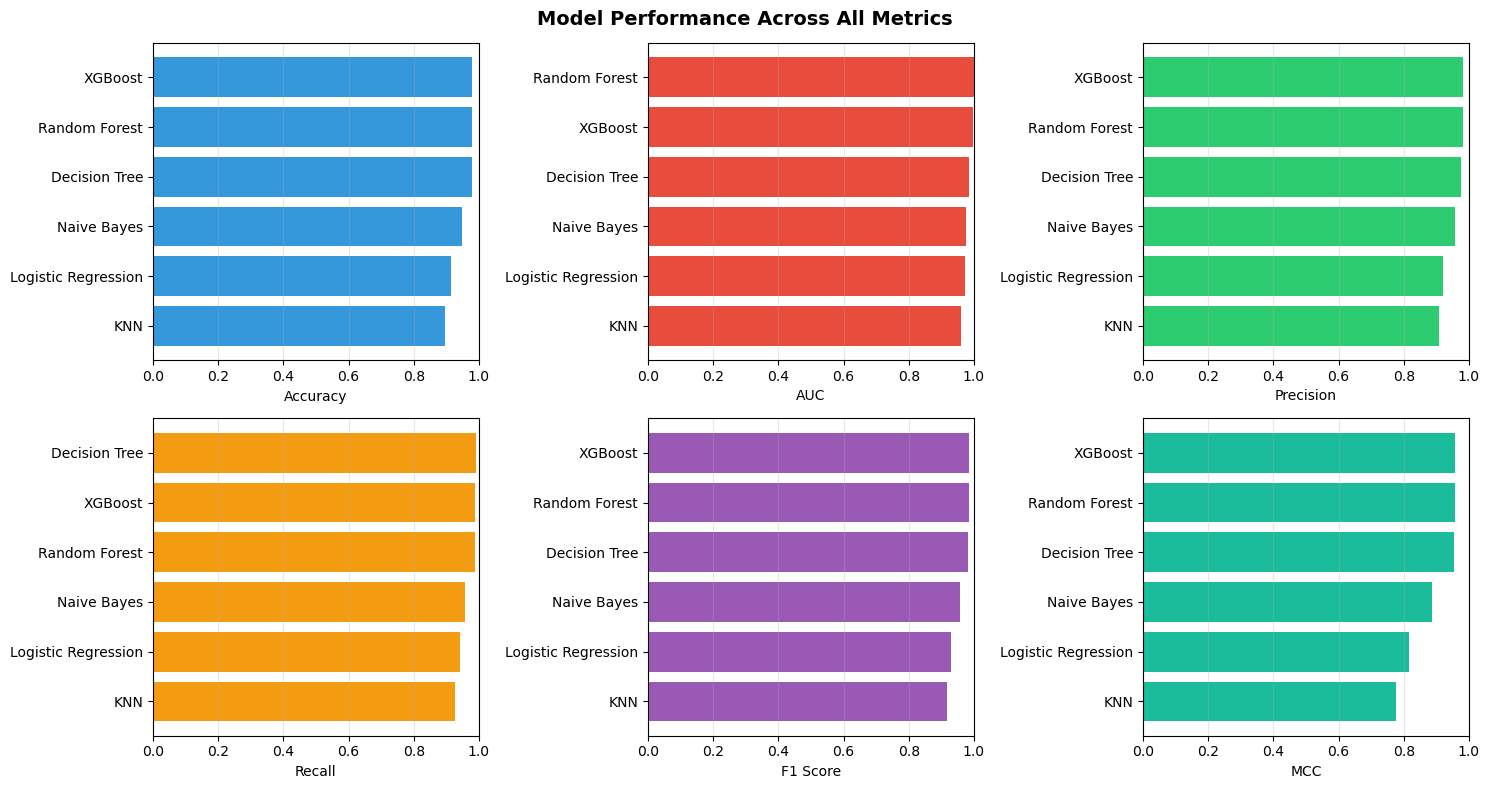

In [102]:
# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'MCC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for ax, metric, color in zip(axes.flat, metrics, colors):
    data = results_df.sort_values(metric, ascending=True)
    ax.barh(data['ML Model Name'], data[metric], color=color)
    ax.set_xlabel(metric)
    ax.set_xlim(0, 1)
    ax.grid(axis='x', alpha=0.3)

plt.suptitle('Model Performance Across All Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Best Model Analysis

In [103]:
# Identify best model
best_idx = results_df['F1 Score'].idxmax()
best_model_name = results_df.loc[best_idx, 'ML Model Name']
best_metrics = results_df.loc[best_idx]

print(f"\n{'='*70}")
print(f"BEST MODEL: {best_model_name}")
print("="*70)
print(f"\nPerformance:")
print(f"  Accuracy:  {best_metrics['Accuracy']:.4f}")
print(f"  AUC:       {best_metrics['AUC']:.4f}")
print(f"  Precision: {best_metrics['Precision']:.4f}")
print(f"  Recall:    {best_metrics['Recall']:.4f}")
print(f"  F1 Score:  {best_metrics['F1 Score']:.4f}")
print(f"  MCC:       {best_metrics['MCC']:.4f}")


BEST MODEL: Random Forest

Performance:
  Accuracy:  0.9801
  AUC:       0.9988
  Precision: 0.9813
  Recall:    0.9868
  F1 Score:  0.9840
  MCC:       0.9576


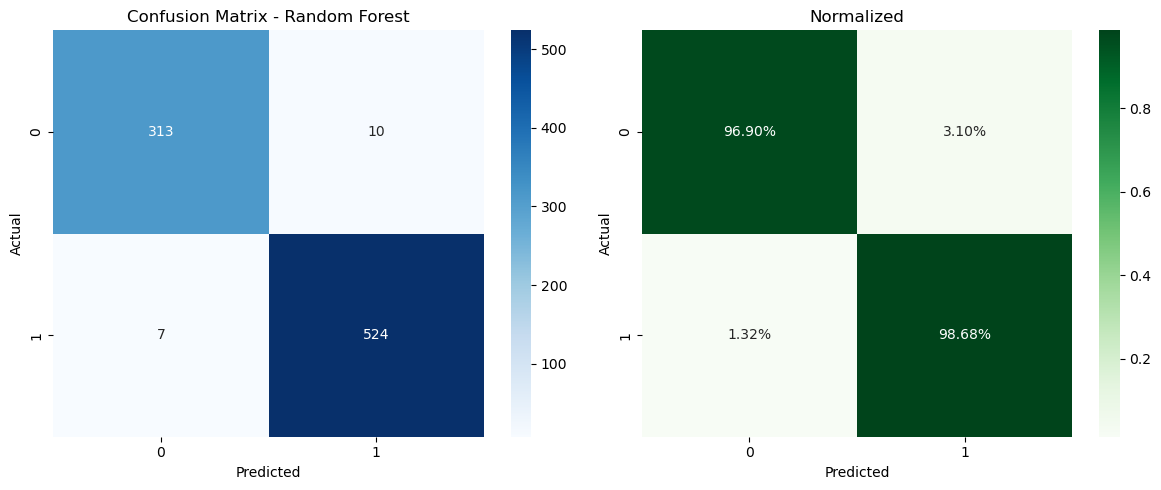


Classification Report:
              precision    recall  f1-score   support

    Rejected       0.98      0.97      0.97       323
    Approved       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [104]:
# Confusion matrix for best model
best_model = models[best_model_name]

if best_model_name in models_requiring_scaling:
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title(f'Confusion Matrix - {best_model_name}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Normalized
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=ax2)
ax2.set_title('Normalized')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

## 9. Save Models & Artifacts

In [105]:
# Create model directory
#os.makedirs('model', exist_ok=True)

# Package everything together
model_package = {
    'models': models,
    'scaler': scaler,
    'best_model': best_model_name,
    'feature_names': list(X.columns)
}

# Save as single file
joblib.dump(model_package, 'loan_models_complete.pkl')

print("✓ Saved: loan_models_complete.pkl")
print("  Contains: All 6 models, scaler, and feature names")

# Save test data sample for Streamlit
test_sample = pd.concat([X_test.head(100), y_test.head(100)], axis=1)
test_sample.to_csv('test_data_sample.csv', index=False)
print("\n✓ Saved: test_data_sample.csv")

print("\nAll done! Models saved successfully.")


✓ Saved: loan_models_complete.pkl
  Contains: All 6 models, scaler, and feature names

✓ Saved: test_data_sample.csv

All done! Models saved successfully.


## 10. Test Loaded Models (Verification)

In [106]:
# Load and verify
loaded = joblib.load('loan_models_complete.pkl')

print("Loaded models:")
for name in loaded['models'].keys():
    print(f"  • {name}")

print(f"\nFeatures: {len(loaded['feature_names'])}")
print(f"Best model: {loaded['best_model']}")

# Quick test
test_model = loaded['models']['Random Forest']
test_pred = test_model.predict(X_test.iloc[0:1])[0]
test_actual = y_test.iloc[0]

print(f"\nQuick prediction test:")
print(f"  Predicted: {'Approved' if test_pred == 1 else 'Rejected'}")
print(f"  Actual: {'Approved' if test_actual == 1 else 'Rejected'}")
print(f"  {'✓ Match!' if test_pred == test_actual else '✗ Different'}")

Loaded models:
  • Logistic Regression
  • Decision Tree
  • KNN
  • Naive Bayes
  • Random Forest
  • XGBoost

Features: 13
Best model: Random Forest

Quick prediction test:
  Predicted: Approved
  Actual: Rejected
  ✗ Different
